<a href="https://colab.research.google.com/github/AarthiKalyanasundaram/pycaret/blob/master/RatingspredictionforMovielensDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 65.9MB 57kB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 12.4MB 41.1MB/s 
     |████████████████████████████████| 1.6MB 35.7MB/s 
     |████████████████████████████████| 6.8MB 38.6MB/s 
     |████████████████████████████████| 1.2MB 44.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 266kB 48.6MB/s 
     |████████████████████████████████| 266kB 47.5MB/s 
     |████████████████████████████████| 2.1MB 40.7MB/s 
     |████████████████████████████████| 327kB 40.6MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 163kB 47.7MB/s 
     |████████████████████████████████| 153kB 51.7MB/s 
     |████████████████████████████████| 6.0MB 44.7MB/s 
     |████████████████████████████████| 1.1MB 38.3MB/s 
  Installing build dependencies ... done
  Getting req

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [4]:
#reading data using pandas 
from google.colab import files
uploaded = files.upload()
import io
movies = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
ratings = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [5]:
#analyzing the movies dataframe in order to understand the Dtypes, number of non null rows and number of columsn with this name by using info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
#Analyzing the movies dataframe like the how the data will look like
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#sorting the movies dataset
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)

In [8]:
#extract the year from the title column and add it as another column for analysis purpose
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year)
movies.year = movies.year.dt.year

In [9]:
#Removing the year from the title column
movies.title = movies.title.str[:-7]
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017.0
9739,193585,Flint,Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018.0


In [10]:
#Merging the movies dataframe and ratings dataframe using inner join with the help of merge
data = movies.merge(ratings, on='movieId',how="inner")
data.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,17,4.5,1305696483


In [11]:
#converting the timestamp to datetime format 
data["timestamp"] = pd.to_datetime(data["timestamp"],unit="s")

In [12]:
data.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,4.0,2000-07-30 18:45:03
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,4.0,1996-11-08 06:36:02
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,7,4.5,2005-01-25 06:52:26
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,15,2.5,2017-11-13 12:59:30
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,17,4.5,2011-05-18 05:28:03


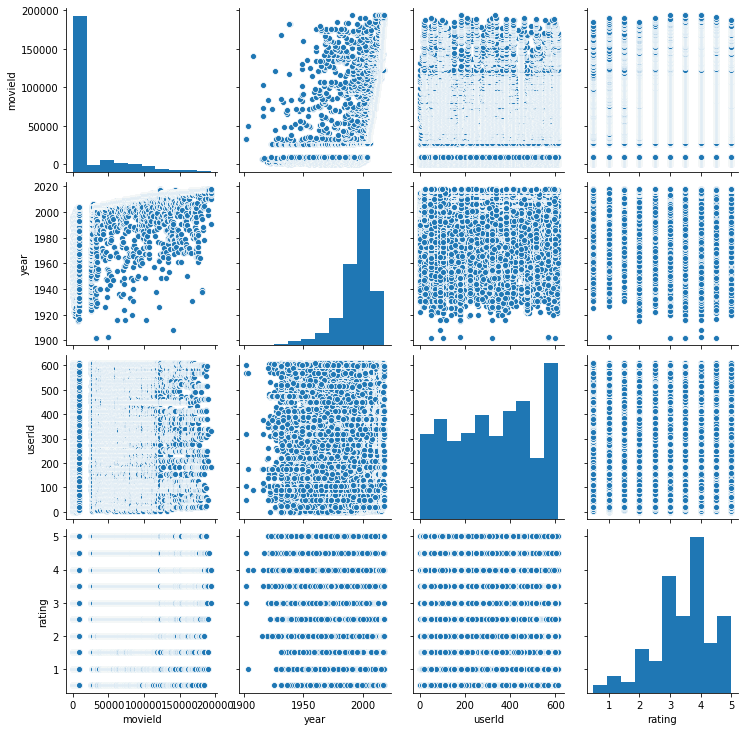

In [13]:
#creating a pairplot

import seaborn as sns

sns.pairplot(data)

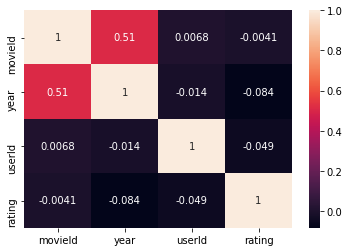

In [14]:
#To find out the correlation creating the heatmap

correlation = data.corr()
sns.heatmap(correlation,annot = True)

In [15]:
#dropping the columns the timestamp, title and genres since these are not relevant for predicting the ratings

data.drop(['timestamp','title','genres'], axis=1,inplace=True)

In [33]:
data.dropna(axis=0,how="any")

,movieId,year,userId,rating
0,1,1995.0,1,4.0
1,1,1995.0,5,4.0
2,1,1995.0,7,4.5
3,1,1995.0,15,2.5
4,1,1995.0,17,4.5
...,...,...,...,...
100831,193581,2017.0,184,4.0
100832,193583,2017.0,184,3.5
100833,193585,2017.0,184,3.5
100834,193587,2018.0,184,3.5


In [40]:
#Train test split 

finaldata = data.sample(frac=0.8, random_state=42).reset_index(drop=True)
data_unseen = data.drop(finaldata.index).reset_index(drop=True)

print('Data for Modeling: ' + str(finaldata.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (80669, 4)
Unseen Data For Predictions: (20167, 4)


In [41]:
#importing the pycaret

from pycaret.regression import *
reg = setup(data = finaldata, target = 'rating', session_id=1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(80669, 4)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.7163,0.8469,0.9202,0.2214,0.2478,0.3235,7.8745
1,Light Gradient Boosting Machine,0.7323,0.8761,0.9359,0.1946,0.2517,0.3316,0.2846
2,Gradient Boosting Regressor,0.7725,0.9570,0.9782,0.1202,0.2621,0.3518,3.4458
3,Extreme Gradient Boosting,0.7731,0.9583,0.9789,0.1191,0.2622,0.3520,1.3435
4,Random Forest,0.7687,0.9977,0.9988,0.0828,0.2634,0.3316,9.9367
5,Ridge Regression,0.8279,1.0756,1.0371,0.0112,0.2755,0.3767,0.0057
6,Least Angle Regression,0.8279,1.0756,1.0371,0.0112,0.2755,0.3767,0.0064
7,Bayesian Ridge,0.8279,1.0756,1.0371,0.0112,0.2755,0.3767,0.0095
8,Linear Regression,0.8279,1.0756,1.0371,0.0112,0.2755,0.3767,0.0080
9,Elastic Net,0.8283,1.0773,1.0379,0.0097,0.2758,0.3771,0.0078


In [43]:
model = create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7606,0.9331,0.9660,0.1220,0.2587,0.3440
1,0.7695,0.9475,0.9734,0.1109,0.2589,0.3453
2,0.7715,0.9452,0.9722,0.1215,0.2585,0.3433
3,0.7657,0.9362,0.9676,0.1267,0.2585,0.3439
4,0.7726,0.9545,0.9770,0.1083,0.2606,0.3489
5,0.7681,0.9510,0.9752,0.1148,0.2608,0.3488
6,0.7905,0.9985,0.9992,0.1180,0.2695,0.3668
7,0.7804,0.9729,0.9863,0.1272,0.2642,0.3563
8,0.7770,0.9733,0.9866,0.1210,0.2670,0.3638
9,0.7747,0.9704,0.9851,0.1202,0.2654,0.3589


In [44]:
tune_xgboost = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6798,0.7923,0.8901,0.2545,0.2380,0.2940
1,0.6802,0.7993,0.8941,0.2499,0.2375,0.2947
2,0.6760,0.7805,0.8835,0.2746,0.2345,0.2871
3,0.6781,0.7834,0.8851,0.2692,0.2354,0.2926
4,0.6754,0.7843,0.8856,0.2673,0.2361,0.2940
5,0.6762,0.7801,0.8832,0.2739,0.2348,0.2904
6,0.7086,0.8680,0.9317,0.2332,0.2504,0.3181
7,0.6772,0.7885,0.8880,0.2926,0.2386,0.2988
8,0.6909,0.8113,0.9007,0.2673,0.2425,0.3088
9,0.6785,0.7858,0.8864,0.2876,0.2390,0.2983


In [46]:
#To evaluate the tuned model

evaluate_model(tune_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
predict_model(tune_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.6854,0.8027,0.8959,0.263,0.2399,0.3017


In [48]:
#finalizing the model

final_xgboost = finalize_model(tune_xgboost)

In [49]:
predict_model(final_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.6062,0.6316,0.7947,0.4201,0.2139,0.2638


,movieId,year,userId,rating,Label
0,2194.0,1987.0,577.0,4.0,3.8605
1,743.0,1996.0,109.0,3.0,2.3302
2,103341.0,2013.0,380.0,3.0,3.6445
3,76093.0,2010.0,523.0,5.0,4.8467
4,8961.0,2004.0,520.0,4.0,4.1990
...,...,...,...,...,...
24196,2795.0,1983.0,274.0,3.5,3.6393
24197,362.0,1994.0,436.0,3.0,3.6328
24198,135567.0,2016.0,448.0,1.5,2.1755
24199,313.0,1994.0,476.0,4.0,3.2356


In [50]:
#predicting the unseen (test data) using the final_knn

unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,movieId,year,userId,rating,Label
0,36519,2005.0,380,3.0,3.7467
1,36519,2005.0,382,3.5,3.6912
2,36519,2005.0,387,3.0,3.0628
3,36519,2005.0,414,2.5,3.3960
4,36519,2005.0,438,4.0,3.4585


In [51]:
unseen_predictions

,movieId,year,userId,rating,Label
0,36519,2005.0,380,3.0,3.7467
1,36519,2005.0,382,3.5,3.6912
2,36519,2005.0,387,3.0,3.0628
3,36519,2005.0,414,2.5,3.3960
4,36519,2005.0,438,4.0,3.4585
...,...,...,...,...,...
20162,193581,2017.0,184,4.0,3.8159
20163,193583,2017.0,184,3.5,3.8159
20164,193585,2017.0,184,3.5,3.8159
20165,193587,2018.0,184,3.5,3.6092
